Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.7363
Epoch 10, Loss: 0.6567
Epoch 20, Loss: 0.6324
Epoch 30, Loss: 0.6056
Epoch 40, Loss: 0.5778
Epoch 50, Loss: 0.5511
Epoch 60, Loss: 0.5274
Epoch 70, Loss: 0.5076
Epoch 80, Loss: 0.4916
Epoch 90, Loss: 0.4788
Epoch 100, Loss: 0.4687
Epoch 110, Loss: 0.4605
Epoch 120, Loss: 0.4536
Epoch 130, Loss: 0.4478
Epoch 140, Loss: 0.4427
Epoch 150, Loss: 0.4380
Epoch 160, Loss: 0.4335
Epoch 170, Loss: 0.4292
Epoch 180, Loss: 0.4249
Epoch 190, Loss: 0.4206
Epoch 200, Loss: 0.4161
Epoch 210, Loss: 0.4113
Epoch 220, Loss: 0.4064
Epoch 230, Loss: 0.4010
Epoch 240, Loss: 0.3953
Epoch 250, Loss: 0.3892
Epoch 260, Loss: 0.3824
Epoch 270, Loss: 0.3751
Epoch 280, Loss: 0.3670
Epoch 290, Loss: 0.3581
Epoch 300, Loss: 0.3485
Epoch 310, Loss: 0.3383
Epoch 320, Loss: 0.3277
Epoch 330, Loss: 0.3170
Epoch 340, Loss: 0.3064
Epoch 350, Loss: 0.2959
Epoch 360, Loss: 

<Axes: >

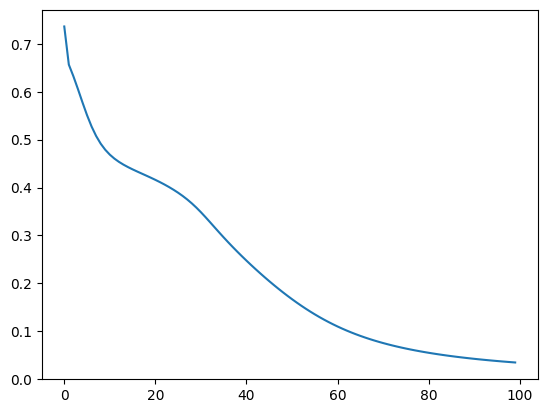

In [108]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

loss_history = []

input_size = X_train.shape[1]
hidden_size = 10  # Number of neurons in hidden layer
output_size = y_train.shape[1]
learning_rate = 0.6
epochs = 1000

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2
    
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

def binary_crossentropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    epsilon = 1e-8  # small value to avoid division by zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # clip predictions to avoid log(0)
    loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
    loss_history.append(loss)
    return loss


for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train)
    backward_propagation(X_train, y_train, Z1, A1, Z2, A2)
    
    if epoch % 10 == 0:
        loss = binary_crossentropy_loss(y_train, A2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

_, _, _, A2_test = forward_propagation(X_test)
predictions = (A2_test > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.2698
Epoch 10, Loss: 0.2445
Epoch 20, Loss: 0.2394
Epoch 30, Loss: 0.2370
Epoch 40, Loss: 0.2350
Epoch 50, Loss: 0.2329
Epoch 60, Loss: 0.2308
Epoch 70, Loss: 0.2286
Epoch 80, Loss: 0.2265
Epoch 90, Loss: 0.2243
Epoch 100, Loss: 0.2220
Epoch 110, Loss: 0.2197
Epoch 120, Loss: 0.2174
Epoch 130, Loss: 0.2151
Epoch 140, Loss: 0.2128
Epoch 150, Loss: 0.2104
Epoch 160, Loss: 0.2081
Epoch 170, Loss: 0.2057
Epoch 180, Loss: 0.2034
Epoch 190, Loss: 0.2010
Epoch 200, Loss: 0.1988
Epoch 210, Loss: 0.1965
Epoch 220, Loss: 0.1943
Epoch 230, Loss: 0.1921
Epoch 240, Loss: 0.1900
Epoch 250, Loss: 0.1880
Epoch 260, Loss: 0.1860
Epoch 270, Loss: 0.1841
Epoch 280, Loss: 0.1822
Epoch 290, Loss: 0.1804
Epoch 300, Loss: 0.1787
Epoch 310, Loss: 0.1770
Epoch 320, Loss: 0.1754
Epoch 330, Loss: 0.1739
Epoch 340, Loss: 0.1725
Epoch 350, Loss: 0.1711
Epoch 360, Loss: 

<Axes: >

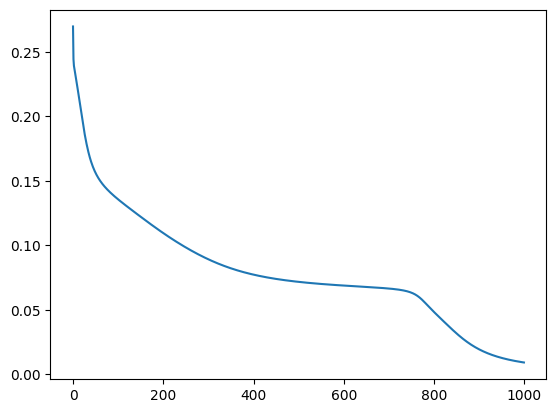

In [109]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Caricamento del dataset Monks con one-hot encoding per le etichette
X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

# Lista per memorizzare la storia della perdita durante l'allenamento
loss_history = []

# Definizione dell'architettura della rete neurale
input_size = X_train.shape[1]   # Numero di input features
hidden_size = 10                # Numero di neuroni nello strato nascosto
output_size = y_train.shape[1]  # Numero di classi nell'output
learning_rate = 0.45             # Tasso di apprendimento
epochs = 10000                   # Numero di epoche di allenamento
loss_function = "mse"  # Funzione di perdita selezionata

# Inizializzazione dei pesi e dei bias
np.random.seed(42)  # Per la riproducibilità dei risultati
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)  # Pesi strato nascosto
b1 = np.zeros((1, hidden_size))  # Bias strato nascosto
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)  # Pesi strato output
b2 = np.zeros((1, output_size))  # Bias strato output

# Funzione di attivazione sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivata della funzione sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Propagazione in avanti (Forward Propagation)
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1  # Calcolo pre-attivazione strato nascosto
    A1 = sigmoid(Z1)         # Applicazione funzione di attivazione
    Z2 = np.dot(A1, W2) + b2  # Calcolo pre-attivazione strato output
    A2 = sigmoid(Z2)         # Applicazione funzione di attivazione
    return Z1, A1, Z2, A2

# Funzione di perdita Binary Crossentropy
def binary_crossentropy_loss(y_true, y_pred):
    m = y_true.shape[0]  # Numero di esempi nel batch
    epsilon = 1e-8  # Piccolo valore per evitare divisioni per zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Evita log(0)
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m

# Funzione di perdita Mean Squared Error (MSE)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Selezione della funzione di perdita
def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)
    loss_history.append(loss)  # Salvataggio della perdita per analisi successive
    return loss

# Propagazione all'indietro (Backpropagation)
def backward_propagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2  # Dichiarazione delle variabili globali
    
    m = X.shape[0]  # Numero di campioni nel batch
    
    # Calcolo dell'errore dell'output in base alla funzione di perdita scelta
    if loss_function == "binary_crossentropy":
        dZ2 = A2 - y  # Derivata della loss rispetto all'output (cross-entropy)
    else:  # Mean Squared Error
        dZ2 = (A2 - y) * sigmoid_derivative(A2)  # Derivata della MSE rispetto all'output
    
    dW2 = (1/m) * np.dot(A1.T, dZ2)  # Gradiente dei pesi dello strato output
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)  # Gradiente del bias output
    
    # Backpropagation attraverso lo strato nascosto
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)  # Derivata rispetto all'input dello strato nascosto
    dW1 = (1/m) * np.dot(X.T, dZ1)  # Gradiente dei pesi dello strato nascosto
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)  # Gradiente del bias strato nascosto
    
    # Aggiornamento dei pesi e dei bias
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Allenamento della rete neurale
for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train)  # Forward propagation
    backward_propagation(X_train, y_train, Z1, A1, Z2, A2)  # Backpropagation e aggiornamento pesi
    
    if epoch % 10 == 0:  # Ogni 10 epoche calcola la perdita
        loss = compute_loss(y_train, A2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Valutazione sul set di test
_, _, _, A2_test = forward_propagation(X_test)
predictions = (A2_test > 0.5).astype(int)  # Conversione delle probabilità in classi binarie
accuracy = np.mean(predictions == y_test)  # Calcolo dell'accuratezza
print(f"Test Accuracy: {accuracy:.4f}")

# Visualizzazione della curva di perdita
pd.Series(loss_history).plot()


Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.7041
Epoch 10, Loss: 0.6021
Epoch 20, Loss: 0.4808
Epoch 30, Loss: 0.4053
Epoch 40, Loss: 0.3565
Epoch 50, Loss: 0.3177
Epoch 60, Loss: 0.2856
Epoch 70, Loss: 0.2581
Epoch 80, Loss: 0.2335
Epoch 90, Loss: 0.2122
Epoch 100, Loss: 0.1936
Epoch 110, Loss: 0.1768
Epoch 120, Loss: 0.1614
Epoch 130, Loss: 0.1485
Epoch 140, Loss: 0.1350
Epoch 150, Loss: 0.1230
Epoch 160, Loss: 0.1113
Epoch 170, Loss: 0.1014
Epoch 180, Loss: 0.0928
Epoch 190, Loss: 0.0846
Epoch 200, Loss: 0.0774
Epoch 210, Loss: 0.0708
Epoch 220, Loss: 0.0657
Epoch 230, Loss: 0.0599
Epoch 240, Loss: 0.0555
Epoch 250, Loss: 0.0519
Epoch 260, Loss: 0.0473
Epoch 270, Loss: 0.0441
Epoch 280, Loss: 0.0410
Epoch 290, Loss: 0.0384
Epoch 300, Loss: 0.0358
Epoch 310, Loss: 0.0336
Epoch 320, Loss: 0.0315
Epoch 330, Loss: 0.0296
Epoch 340, Loss: 0.0279
Epoch 350, Loss: 0.0264
Epoch 360, Loss: 

<Axes: >

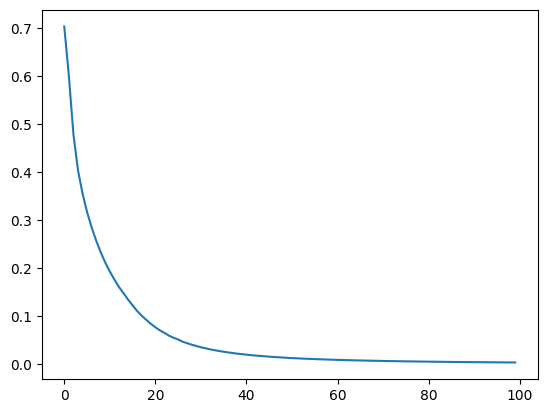

In [110]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# caricamento del dataset monks con one-hot encoding per le etichette
X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

# lista per memorizzare la storia della perdita durante l'allenamento
loss_history = []

# definizione dell'architettura della rete neurale
input_size = X_train.shape[1]   # numero di input features
hidden_size = 10                # numero di neuroni nello strato nascosto
output_size = y_train.shape[1]  # numero di classi nell'output
learning_rate = 0.1             # tasso di apprendimento
epochs = 1000                   # numero di epoche di allenamento
batch_size = 32                 # dimensione del batch
loss_function = "binary_crossentropy"  # funzione di perdita selezionata
activation_function = "relu"  # funzione di attivazione selezionata

# inizializzazione dei pesi e dei bias
np.random.seed(42)  # per la riproducibilità dei risultati
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)  # pesi strato nascosto
b1 = np.zeros((1, hidden_size))  # bias strato nascosto
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)  # pesi strato output
b2 = np.zeros((1, output_size))  # bias strato output

# definizione delle funzioni di attivazione e delle loro derivate
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(x):
    return sigmoid_derivative(x) if activation_function == "sigmoid" else relu_derivative(x)

# propagazione in avanti (forward propagation)
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1  # calcolo pre-attivazione strato nascosto
    A1 = activation(Z1)      # applicazione funzione di attivazione
    Z2 = np.dot(A1, W2) + b2  # calcolo pre-attivazione strato output
    A2 = sigmoid(Z2)         # funzione di attivazione finale (sigmoide per classificazione binaria)
    return Z1, A1, Z2, A2

# funzione di perdita binary crossentropy
def binary_crossentropy_loss(y_true, y_pred):
    m = y_true.shape[0]  # numero di esempi nel batch
    epsilon = 1e-8  # piccolo valore per evitare divisioni per zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # evita log(0)
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m

# funzione di perdita mean squared error (mse)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# selezione della funzione di perdita
def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_pred, y_true)
    loss_history.append(loss)  # salvataggio della perdita per analisi successive
    return loss

# propagazione all'indietro (backpropagation)
def backward_propagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2  # dichiarazione delle variabili globali
    
    m = X.shape[0]  # numero di campioni nel batch
    
    # calcolo dell'errore dell'output in base alla funzione di perdita scelta
    if loss_function == "binary_crossentropy":
        dZ2 = A2 - y  # derivata della loss rispetto all'output (cross-entropy)
    else:  # mean squared error
        dZ2 = (A2 - y) * sigmoid_derivative(A2)  # derivata della mse rispetto all'output
    
    dW2 = (1/m) * np.dot(A1.T, dZ2)  # gradiente dei pesi dello strato output
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)  # gradiente del bias output
    
    # backpropagation attraverso lo strato nascosto
    dZ1 = np.dot(dZ2, W2.T) * activation_derivative(A1)  # derivata rispetto all'input dello strato nascosto
    dW1 = (1/m) * np.dot(X.T, dZ1)  # gradiente dei pesi dello strato nascosto
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)  # gradiente del bias strato nascosto
    
    # aggiornamento dei pesi e dei bias
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# allenamento della rete neurale con mini-batch gradient descent
for epoch in range(epochs):
    # shuffle dei dati per evitare overfitting
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        
        Z1, A1, Z2, A2 = forward_propagation(X_batch)  # forward propagation
        backward_propagation(X_batch, y_batch, Z1, A1, Z2, A2)  # backpropagation e aggiornamento pesi
    
    if epoch % 10 == 0:  # ogni 10 epoche calcola la perdita
        loss = compute_loss(y_train, forward_propagation(X_train)[-1])
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# valutazione sul set di test
_, _, _, A2_test = forward_propagation(X_test)
predictions = (A2_test > 0.5).astype(int)  # conversione delle probabilità in classi binarie
accuracy = np.mean(predictions == y_test)  # calcolo dell'accuratezza
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.2787
Epoch 10, Loss: 0.2360
Epoch 20, Loss: 0.2200
Epoch 30, Loss: 0.2000
Epoch 40, Loss: 0.1757
Epoch 50, Loss: 0.1434
Epoch 60, Loss: 0.1071
Epoch 70, Loss: 0.0780
Epoch 80, Loss: 0.0587
Epoch 90, Loss: 0.0443
Epoch 100, Loss: 0.0335
Epoch 110, Loss: 0.0243
Epoch 120, Loss: 0.0176
Epoch 130, Loss: 0.0127
Epoch 140, Loss: 0.0093
Epoch 150, Loss: 0.0069
Epoch 160, Loss: 0.0051
Epoch 170, Loss: 0.0039
Epoch 180, Loss: 0.0029
Epoch 190, Loss: 0.0022
Epoch 200, Loss: 0.0017
Epoch 210, Loss: 0.0013
Epoch 220, Loss: 0.0011
Epoch 230, Loss: 0.0009
Epoch 240, Loss: 0.0007
Epoch 250, Loss: 0.0006
Epoch 260, Loss: 0.0005
Epoch 270, Loss: 0.0004
Epoch 280, Loss: 0.0003
Epoch 290, Loss: 0.0003
Epoch 300, Loss: 0.0003
Epoch 310, Loss: 0.0002
Epoch 320, Loss: 0.0002
Epoch 330, Loss: 0.0002
Epoch 340, Loss: 0.0001
Epoch 350, Loss: 0.0001
Epoch 360, Loss: 

<Axes: >

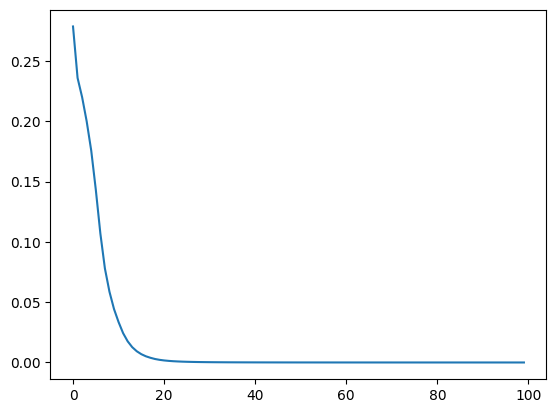

In [111]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Parametri
hidden_layers = [10, 8]  # Lista che specifica il numero di neuroni per ogni hidden layer
learning_rate = 0.05
epochs = 1000
batch_size = 32
loss_function = "mse"
activation_function = "relu"

# Caricamento dataset
X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Inizializzazione pesi e bias
np.random.seed(42)
layers = [input_size] + hidden_layers + [output_size]
W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(len(layers) - 1)]
b = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]

# Funzioni di attivazione
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(x):
    return sigmoid_derivative(x) if activation_function == "sigmoid" else relu_derivative(x)

# Forward propagation
def forward_propagation(X):
    A = [X]
    Z = []
    for i in range(len(W) - 1):
        Z.append(np.dot(A[-1], W[i]) + b[i])
        A.append(activation(Z[-1]))
    
    Z.append(np.dot(A[-1], W[-1]) + b[-1])
    A.append(sigmoid(Z[-1]))  # Output layer usa sigmoide
    return Z, A

# Funzione di perdita
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_loss(y_true, y_pred):
    return binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)

# Backward propagation
def backward_propagation(X, y, Z, A):
    global W, b
    m = X.shape[0]
    dZ = A[-1] - y  # Output layer
    
    dW = [np.dot(A[-2].T, dZ) / m]
    db = [np.sum(dZ, axis=0, keepdims=True) / m]
    
    for i in range(len(W) - 2, -1, -1):
        dZ = np.dot(dZ, W[i+1].T) * activation_derivative(A[i+1])
        dW.insert(0, np.dot(A[i].T, dZ) / m)
        db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
    
    for i in range(len(W)):
        W[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * db[i]

# Training
loss_history = []
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        
        Z, A = forward_propagation(X_batch)
        backward_propagation(X_batch, y_batch, Z, A)
    
    if epoch % 10 == 0:
        loss = compute_loss(y_train, forward_propagation(X_train)[1][-1])
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test
_, A_test = forward_propagation(X_test)
predictions = (A_test[-1] > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 0.2639
Epoch 10, Loss: 0.2558
Epoch 20, Loss: 0.2508
Epoch 30, Loss: 0.2464
Epoch 40, Loss: 0.2422
Epoch 50, Loss: 0.2377
Epoch 60, Loss: 0.2324
Epoch 70, Loss: 0.2258
Epoch 80, Loss: 0.2173
Epoch 90, Loss: 0.2077
Epoch 100, Loss: 0.1958
Epoch 110, Loss: 0.1826
Epoch 120, Loss: 0.1693
Epoch 130, Loss: 0.1560
Epoch 140, Loss: 0.1421
Epoch 150, Loss: 0.1282
Epoch 160, Loss: 0.1134
Epoch 170, Loss: 0.1000
Epoch 180, Loss: 0.0889
Epoch 190, Loss: 0.0798
Epoch 200, Loss: 0.0732
Epoch 210, Loss: 0.0672
Epoch 220, Loss: 0.0628
Epoch 230, Loss: 0.0600
Epoch 240, Loss: 0.0578
Epoch 250, Loss: 0.0560
Epoch 260, Loss: 0.0547
Epoch 270, Loss: 0.0534
Epoch 280, Loss: 0.0524
Epoch 290, Loss: 0.0515
Epoch 300, Loss: 0.0507
Epoch 310, Loss: 0.0502
Epoch 320, Loss: 0.0495
Epoch 330, Loss: 0.0487
Epoch 340, Loss: 0.0481
Epoch 350, Loss: 0.0478
Epoch 360, Loss: 

<Axes: >

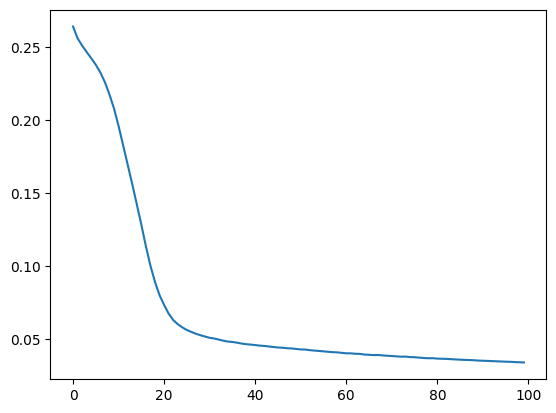

In [112]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Parametri per la rete neurale
hidden_layers = [4, 4]
learning_rate = 0.02
epochs = 1000
batch_size = 32
loss_function = "mse"  # "mse" oppure "binary_crossentropy"
activation_function = "relu"
lambda_reg = 0.0005  # Coefficiente di regolarizzazione L2 (Tikhonov)

# Caricamento dataset
X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Inizializzazione pesi e bias
np.random.seed(42)
layers = [input_size] + hidden_layers + [output_size]
W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(len(layers) - 1)]
b = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]

# Funzioni di attivazione
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(x):
    return sigmoid_derivative(x) if activation_function == "sigmoid" else relu_derivative(x)

# Forward propagation
def forward_propagation(X):
    A = [X]
    Z = []
    for i in range(len(W) - 1):
        Z.append(np.dot(A[-1], W[i]) + b[i])
        A.append(activation(Z[-1]))
    Z.append(np.dot(A[-1], W[-1]) + b[-1])
    A.append(sigmoid(Z[-1]))  # Output layer usa sigmoide
    return Z, A

# Funzioni di perdita
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)
    reg_term = (lambda_reg / 2) * sum(np.sum(W_i ** 2) for W_i in W)  # L2 regularization
    return loss + reg_term

# Derivata della loss
def loss_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    if loss_function == "mse":
        return y_pred - y_true
    elif loss_function == "binary_crossentropy":
        return (y_pred - y_true) / (y_pred * (1 - y_pred))

# Backward propagation con regolarizzazione L2
def backward_propagation(X, y, Z, A):
    global W, b
    m = X.shape[0]
    dZ = loss_derivative(y, A[-1])
    
    dW = [np.dot(A[-2].T, dZ) / m + lambda_reg * W[-1] / m]  # Aggiunta della regolarizzazione
    db = [np.sum(dZ, axis=0, keepdims=True) / m]
    
    for i in range(len(W) - 2, -1, -1):
        dZ = np.dot(dZ, W[i+1].T) * activation_derivative(A[i+1])
        dW.insert(0, np.dot(A[i].T, dZ) / m + lambda_reg * W[i] / m)
        db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
    
    for i in range(len(W)):
        W[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * db[i]

# Training
loss_history = []
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        Z, A = forward_propagation(X_batch)
        backward_propagation(X_batch, y_batch, Z, A)
    
    if epoch % 10 == 0:
        loss = compute_loss(y_train, forward_propagation(X_train)[1][-1])
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test
_, A_test = forward_propagation(X_test)
predictions = (A_test[-1] > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot della loss nel tempo
pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 1.5741
Epoch 10, Loss: 1.5251
Epoch 20, Loss: 1.4939
Epoch 30, Loss: 1.4515
Epoch 40, Loss: 1.5236
Epoch 50, Loss: 1.9696
Epoch 60, Loss: 21.0582
Epoch 70, Loss: 21.0413
Epoch 80, Loss: 147.5815
Epoch 90, Loss: 145.9716
Epoch 100, Loss: 146.4080
Epoch 110, Loss: 145.5904
Epoch 120, Loss: 144.8174
Epoch 130, Loss: 144.0553
Epoch 140, Loss: 143.2988
Epoch 150, Loss: 142.5465
Epoch 160, Loss: 141.7983
Epoch 170, Loss: 141.0540
Epoch 180, Loss: 140.3137
Epoch 190, Loss: 139.5772
Epoch 200, Loss: 138.8446
Epoch 210, Loss: 138.1159
Epoch 220, Loss: 137.3911
Epoch 230, Loss: 136.6700
Epoch 240, Loss: 135.9528
Epoch 250, Loss: 135.2393
Epoch 260, Loss: 134.5296
Epoch 270, Loss: 133.8237
Epoch 280, Loss: 133.1215
Epoch 290, Loss: 132.4230
Epoch 300, Loss: 131.7281
Epoch 310, Loss: 131.0370
Epoch 320, Loss: 130.3494
Epoch 330, Loss: 129.6655
Epoch 340, 

<Axes: >

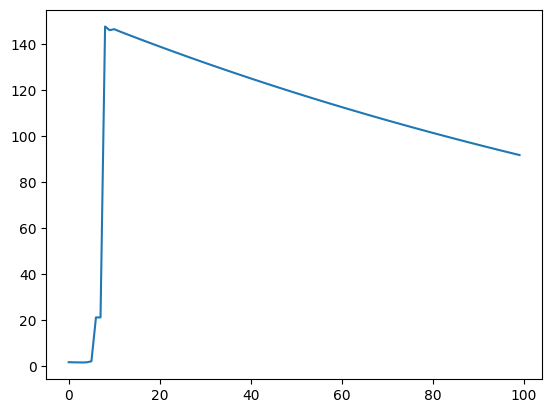

In [113]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Parametri per la rete neurale
hidden_layers = [4, 4]
learning_rate = 0.02
epochs = 1000
batch_size = 32
loss_function = "binary_crossentropy"  # "mse" oppure "binary_crossentropy"
activation_function = "relu"
lambda_reg = 0.1  # Coefficiente di regolarizzazione L2 (Tikhonov)

# Caricamento dataset
X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Inizializzazione pesi e bias
np.random.seed(42)
layers = [input_size] + hidden_layers + [output_size]
W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(len(layers) - 1)]
b = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]

# Funzioni di attivazione
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(x):
    return sigmoid_derivative(x) if activation_function == "sigmoid" else relu_derivative(x)

# Forward propagation
def forward_propagation(X):
    A = [X]
    Z = []
    for i in range(len(W) - 1):
        Z.append(np.dot(A[-1], W[i]) + b[i])
        A.append(activation(Z[-1]))
    Z.append(np.dot(A[-1], W[-1]) + b[-1])
    A.append(sigmoid(Z[-1]))  # Output layer usa sigmoide
    return Z, A

# Funzioni di perdita
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)
    reg_term = (lambda_reg / 2) * sum(np.sum(W_i ** 2) for W_i in W)  # L2 regularization
    return loss + reg_term

# Derivata della loss
def loss_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    if loss_function == "mse":
        return y_pred - y_true
    elif loss_function == "binary_crossentropy":
        return (y_pred - y_true) / (y_pred * (1 - y_pred))

# Backward propagation con regolarizzazione L2
def backward_propagation(X, y, Z, A):
    global W, b
    m = X.shape[0]
    dZ = loss_derivative(y, A[-1])
    
    dW = [np.dot(A[-2].T, dZ) / m + lambda_reg * W[-1] / m]  # Aggiunta della regolarizzazione
    db = [np.sum(dZ, axis=0, keepdims=True) / m]
    
    for i in range(len(W) - 2, -1, -1):
        dZ = np.dot(dZ, W[i+1].T) * activation_derivative(A[i+1])
        dW.insert(0, np.dot(A[i].T, dZ) / m + lambda_reg * W[i] / m)
        db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
    
    for i in range(len(W)):
        W[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * db[i]

# Training
loss_history = []
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        Z, A = forward_propagation(X_batch)
        backward_propagation(X_batch, y_batch, Z, A)
    
    if epoch % 10 == 0:
        loss = compute_loss(y_train, forward_propagation(X_train)[1][-1])
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test
_, A_test = forward_propagation(X_test)
predictions = (A_test[-1] > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot della loss nel tempo
pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 0.8021
Epoch 10, Loss: 0.7914
Epoch 20, Loss: 0.7829
Epoch 30, Loss: 0.7759
Epoch 40, Loss: 0.7700
Epoch 50, Loss: 0.7648
Epoch 60, Loss: 0.7603
Epoch 70, Loss: 0.7560
Epoch 80, Loss: 0.7519
Epoch 90, Loss: 0.7482
Epoch 100, Loss: 0.7445
Epoch 110, Loss: 0.7410
Epoch 120, Loss: 0.7377
Epoch 130, Loss: 0.7345
Epoch 140, Loss: 0.7315
Epoch 150, Loss: 0.7285
Epoch 160, Loss: 0.7253
Epoch 170, Loss: 0.7221
Epoch 180, Loss: 0.7187
Epoch 190, Loss: 0.7152
Epoch 200, Loss: 0.7115
Epoch 210, Loss: 0.7076
Epoch 220, Loss: 0.7034
Epoch 230, Loss: 0.6992
Epoch 240, Loss: 0.6948
Epoch 250, Loss: 0.6903
Epoch 260, Loss: 0.6858
Epoch 270, Loss: 0.6808
Epoch 280, Loss: 0.6756
Epoch 290, Loss: 0.6701
Epoch 300, Loss: 0.6645
Epoch 310, Loss: 0.6586
Epoch 320, Loss: 0.6523
Epoch 330, Loss: 0.6461
Epoch 340, Loss: 0.6397
Epoch 350, Loss: 0.6326
Epoch 360, Loss: 

<Axes: >

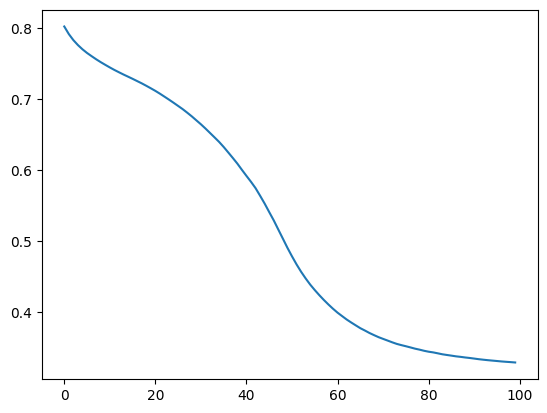

In [114]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Parametri per la rete neurale
hidden_layers = [4, 4]
learning_rate = 0.9
epochs = 1000
batch_size = 32
loss_function = "binary_crossentropy"  # "mse" oppure "binary_crossentropy"
activation_function = "relu"  # Attivazione per i layer nascosti
output_activation_function = "sigmoid"  # Attivazione per l'output layer
lambda_reg = 0.01  # Coefficiente di regolarizzazione L2 (Tikhonov)

# Caricamento dataset
X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Inizializzazione pesi e bias
np.random.seed(42)
layers = [input_size] + hidden_layers + [output_size]
W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(len(layers) - 1)]
b = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]

# Funzioni di attivazione
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    # a = sigmoid(x)
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Funzione per i layer nascosti (parametrica)
def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(a):
    return sigmoid_derivative(a) if activation_function == "sigmoid" else relu_derivative(a)

# Funzione per l'output layer (parametrica)
def output_activation(x):
    return sigmoid(x) if output_activation_function == "sigmoid" else relu(x)

def output_activation_derivative(a):
    return sigmoid_derivative(a) if output_activation_function == "sigmoid" else relu_derivative(a)

# Forward propagation
def forward_propagation(X):
    A = [X]
    Z = []
    # Calcolo per i layer nascosti
    for i in range(len(W) - 1):
        Z_curr = np.dot(A[-1], W[i]) + b[i]
        Z.append(Z_curr)
        A.append(activation(Z_curr))
    # Output layer: usiamo la funzione di attivazione parametrica
    Z_output = np.dot(A[-1], W[-1]) + b[-1]
    Z.append(Z_output)
    A.append(output_activation(Z_output))
    return Z, A

# Funzioni di perdita
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)
    reg_term = (lambda_reg / 2) * sum(np.sum(W_i ** 2) for W_i in W)  # L2 regularization
    return loss + reg_term

# Derivata della loss rispetto all'output A (senza considerare l'attivazione)
def loss_derivative(y_true, y_pred):
    m = y_true.shape[0]
    if loss_function == "mse":
        return (y_pred - y_true) / m
    elif loss_function == "binary_crossentropy":
        # Nota: se l'output activation è sigmoid, la derivata combinata (loss + sigmoide) si semplifica
        # Tuttavia, per mantenere tutto parametrico, calcoliamo la derivata della loss e poi moltiplichiamo per quella dell'attivazione
        return (y_pred - y_true) / m

# Backward propagation con regolarizzazione L2
def backward_propagation(X, y, Z, A):
    global W, b
    m = X.shape[0]
    # Calcolo del gradiente per l'output layer
    dA_output = loss_derivative(y, A[-1])
    # Moltiplichiamo per la derivata della funzione di attivazione dell'output
    dZ_output = dA_output * output_activation_derivative(A[-1])
    dW = [np.dot(A[-2].T, dZ_output) / m + lambda_reg * W[-1] / m]
    db = [np.sum(dZ_output, axis=0, keepdims=True) / m]
    
    # Propagazione all'indietro per i layer nascosti
    dZ = dZ_output  # inizialmente dZ per l'output layer
    for i in range(len(W) - 2, -1, -1):
        # dA del layer corrente (calcolato tramite il layer successivo)
        dA = np.dot(dZ, W[i+1].T)
        # Moltiplichiamo per la derivata dell'attivazione del layer nascosto
        dZ = dA * activation_derivative(A[i+1])
        dW.insert(0, np.dot(A[i].T, dZ) / m + lambda_reg * W[i] / m)
        db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
    
    # Aggiornamento dei pesi e bias
    for i in range(len(W)):
        W[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * db[i]

# Training
loss_history = []
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        Z, A = forward_propagation(X_batch)
        backward_propagation(X_batch, y_batch, Z, A)
    
    if epoch % 10 == 0:
        loss = compute_loss(y_train, forward_propagation(X_train)[1][-1])
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test
_, A_test = forward_propagation(X_test)
predictions = (A_test[-1] > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot della loss nel tempo
pd.Series(loss_history).plot()


Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 0.2171
Epoch 10, Loss: 0.2129
Epoch 20, Loss: 0.2092
Epoch 30, Loss: 0.2059
Epoch 40, Loss: 0.2030
Epoch 50, Loss: 0.2003
Epoch 60, Loss: 0.1978
Epoch 70, Loss: 0.1954
Epoch 80, Loss: 0.1932
Epoch 90, Loss: 0.1910
Epoch 100, Loss: 0.1889
Epoch 110, Loss: 0.1869
Epoch 120, Loss: 0.1850
Epoch 130, Loss: 0.1832
Epoch 140, Loss: 0.1814
Epoch 150, Loss: 0.1797
Epoch 160, Loss: 0.1779
Epoch 170, Loss: 0.1762
Epoch 180, Loss: 0.1745
Epoch 190, Loss: 0.1728
Epoch 200, Loss: 0.1710
Epoch 210, Loss: 0.1693
Epoch 220, Loss: 0.1675
Epoch 230, Loss: 0.1657
Epoch 240, Loss: 0.1640
Epoch 250, Loss: 0.1622
Epoch 260, Loss: 0.1605
Epoch 270, Loss: 0.1587
Epoch 280, Loss: 0.1569
Epoch 290, Loss: 0.1550
Epoch 300, Loss: 0.1531
Epoch 310, Loss: 0.1512
Epoch 320, Loss: 0.1493
Epoch 330, Loss: 0.1474
Epoch 340, Loss: 0.1455
Epoch 350, Loss: 0.1434
Epoch 360, Loss: 

<Axes: >

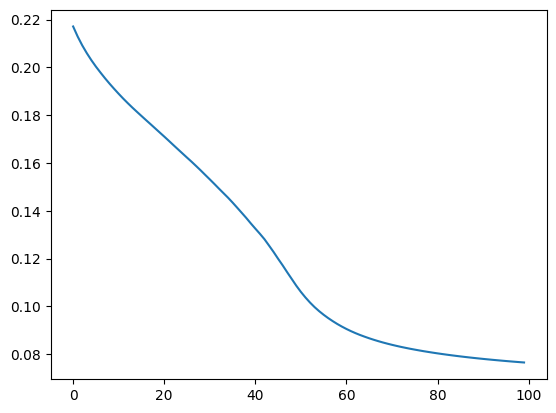

In [115]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Parametri
hidden_layers = [4, 4]
learning_rate = 0.9
epochs = 1000
batch_size = 32
loss_function = "mse"  # oppure "mse"
activation_function = "relu"           # oppure "sigmoid"
output_activation_function = "sigmoid" # oppure "relu"
lambda_reg = 0.01

# Caricamento del dataset
X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Inizializzazione dei pesi e bias
np.random.seed(42)
layers = [input_size] + hidden_layers + [output_size]
W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i])
     for i in range(len(layers) - 1)]
b = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]

# Funzioni di attivazione e loro derivate
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z):
    return (z > 0).astype(float)

def activation(x):
    if activation_function == "sigmoid":
        return sigmoid(x)
    else:
        return relu(x)

def activation_derivative(z, a):
    """
    Utilizza i valori pre-attivazione (z) per il calcolo della derivata,
    utile soprattutto per ReLU.
    """
    if activation_function == "sigmoid":
        return sigmoid_derivative(a)
    else:
        return relu_derivative(z)

def output_activation(x):
    if output_activation_function == "sigmoid":
        return sigmoid(x)
    else:
        return relu(x)

def output_activation_derivative(z, a):
    if output_activation_function == "sigmoid":
        return sigmoid_derivative(a)
    else:
        return relu_derivative(z)

# Forward propagation: memorizza sia Z (pre-attivazione) che A (attivazione)
def forward_propagation(X):
    A = [X]
    Z = []
    # Layer nascosti
    for i in range(len(W) - 1):
        Z_curr = np.dot(A[-1], W[i]) + b[i]
        Z.append(Z_curr)
        A.append(activation(Z_curr))
    # Layer di output
    Z_output = np.dot(A[-1], W[-1]) + b[-1]
    Z.append(Z_output)
    A.append(output_activation(Z_output))
    return Z, A

# Funzioni di loss
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mse_loss(y_true, y_pred):
    # Usando 0.5 per semplificare la derivata
    return 0.5 * np.mean((y_true - y_pred) ** 2)

def compute_loss(y_true, y_pred):
    loss = (binary_crossentropy_loss(y_true, y_pred)
            if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred))
    reg_term = (lambda_reg / 2) * sum(np.sum(W_i ** 2) for W_i in W)
    return loss + reg_term

def loss_derivative(y_true, y_pred):
    m = y_true.shape[0]
    # Per entrambe le loss (con sigmoid in output e one-hot encoding per binary_crossentropy)
    # la derivata risulta (y_pred - y_true) se la loss è definita in questo modo.
    return (y_pred - y_true) / m

# Backward propagation: calcola i gradienti e aggiorna i pesi e i bias
def backward_propagation(X, y, Z, A):
    global W, b
    m = X.shape[0]
    # Layer di output
    dA = loss_derivative(y, A[-1])
    dZ = dA * output_activation_derivative(Z[-1], A[-1])
    dW = [np.dot(A[-2].T, dZ) / m + lambda_reg * W[-1] / m]
    db = [np.sum(dZ, axis=0, keepdims=True) / m]

    # Layer nascosti (iterando all'indietro)
    for i in range(len(W) - 2, -1, -1):
        dA = np.dot(dZ, W[i+1].T)
        dZ = dA * activation_derivative(Z[i], A[i+1])
        dW.insert(0, np.dot(A[i].T, dZ) / m + lambda_reg * W[i] / m)
        db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)

    # Aggiornamento dei pesi e dei bias
    for i in range(len(W)):
        W[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * db[i]

# Ciclo di training
loss_history = []
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]
        Z, A = forward_propagation(X_batch)
        backward_propagation(X_batch, y_batch, Z, A)
    if epoch % 10 == 0:
        Z_train, A_train = forward_propagation(X_train)
        loss = compute_loss(y_train, A_train[-1])
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Valutazione sul test set
Z_test, A_test = forward_propagation(X_test)
if output_size == 1:
    predictions = (A_test[-1] > 0.5).astype(int)
    accuracy = np.mean(predictions == y_test)
else:
    predictions = np.argmax(A_test[-1], axis=1)
    labels = np.argmax(y_test, axis=1)
    accuracy = np.mean(predictions == labels)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 0.2595
Epoch 15, Loss: 0.2474
Epoch 30, Loss: 0.2393
Epoch 45, Loss: 0.2309
Epoch 60, Loss: 0.2188
Epoch 75, Loss: 0.2028
Epoch 90, Loss: 0.1809
Epoch 105, Loss: 0.1584
Epoch 120, Loss: 0.1360
Epoch 135, Loss: 0.1122
Epoch 150, Loss: 0.0920
Epoch 165, Loss: 0.0778
Epoch 180, Loss: 0.0684
Epoch 195, Loss: 0.0621
Epoch 210, Loss: 0.0578
Epoch 225, Loss: 0.0548
Epoch 240, Loss: 0.0525
Epoch 255, Loss: 0.0506
Epoch 270, Loss: 0.0491
Epoch 285, Loss: 0.0478
Test Accuracy: 0.9606


<Axes: >

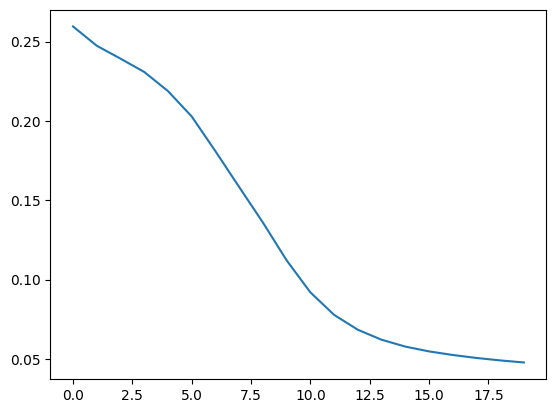

In [116]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# ============================
# Funzioni di attivazione e derivate
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # z non viene usato, ma lo manteniamo per avere la stessa firma
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a)
}

# ============================
# Funzioni di loss e derivate
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # Derivata elementwise: dL/dy_pred = - y_true/y_pred + (1-y_true)/(1-y_pred)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Classe della Rete Neurale
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.9, lambda_reg=0.01,
                 loss_function_name="binary_crossentropy",
                 activation_function_name="relu",
                 output_activation_function_name="sigmoid"):
        """
        :param layers: lista con la dimensione di ogni layer (input, hidden, output)
        :param learning_rate: tasso di apprendimento
        :param lambda_reg: coefficiente di regolarizzazione L2
        :param loss_function_name: nome della funzione di loss (deve essere presente in loss_functions e loss_derivatives)
        :param activation_function_name: nome della funzione di attivazione per i layer nascosti
        :param output_activation_function_name: nome della funzione di attivazione per il layer di output
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.loss_function_name = loss_function_name
        self.activation_function_name = activation_function_name
        self.output_activation_function_name = output_activation_function_name
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        """Inizializza i pesi e bias utilizzando un metodo di inizializzazione (He in questo esempio)."""
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Attivazione non supportata: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Derivata dell'attivazione non supportata: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        """
        Esegue la forward propagation e ritorna le liste:
        - Z: valori pre-attivazione per ogni layer
        - A: output attivati per ogni layer (incluso l'input come A[0])
        """
        A = [X]
        Z = []
        # Propagazione attraverso i layer nascosti
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_name)
            A.append(a_curr)
        # Propagazione nel layer di output
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.output_activation_function_name)
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        """
        Esegue la backward propagation calcolando i gradienti e aggiornando i parametri.
        La catena del gradiente viene calcolata in maniera modulare.
        """
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Derivata della loss non supportata: {self.loss_function_name}")
        # Calcola dL/dy_pred per l'output
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Calcola dL/dz nel layer di output
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.output_activation_function_name)
        dW = [np.dot(A[-2].T, dZ) / m + self.lambda_reg * self.W[-1] / m]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation nei layer nascosti
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_name)
            dW.insert(0, np.dot(A[i].T, dZ) / m + self.lambda_reg * self.W[i] / m)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Aggiorna i parametri
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=1000, batch_size=32, verbose=True):
        """
        Esegue il training della rete mediante mini-batch gradient descent.
        Ritorna la lista degli errori per ogni epoca (ogni 10 epoche).
        """
        loss_history = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % int(epochs/20) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_term = (self.lambda_reg / 2) * sum(np.sum(w ** 2) for w in self.W)
                total_loss = loss + reg_term
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")
        return loss_history
    
    def predict(self, X):
        """
        Restituisce le predizioni:
          - Se l'output ha un solo neurone, viene usata una soglia a 0.5.
          - Se l'output è one-hot encoded, viene usato argmax.
        """
        _, A = self._forward(X)
        output = A[-1]
        if output.shape[1] == 1:
            return (output > 0.5).astype(int)
        else:
            return np.argmax(output, axis=1)
    
    def evaluate(self, X, y):
        """
        Calcola l'accuratezza.
        Se y è one-hot encoded, converte le etichette in formato indice.
        """
        predictions = self.predict(X)
        if y.ndim > 1 and y.shape[1] > 1:
            y_true = np.argmax(y, axis=1)
        else:
            y_true = y
        return np.mean(predictions == y_true)

# ============================
# Esecuzione: Caricamento dataset, training e valutazione
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]
layers = [input_size, 4, 4, output_size]

# Istanziamo la rete con i parametri desiderati (nessuna assunzione implicita)
nn = NeuralNetwork(
    layers,
    learning_rate=0.05,
    lambda_reg=0.00001,
    loss_function_name="mse",
    activation_function_name="relu",
    output_activation_function_name="sigmoid"
)

loss_history = nn.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)
accuracy = nn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()


Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 0.2596
Epoch 15, Loss: 0.2474
Epoch 30, Loss: 0.2392
Epoch 45, Loss: 0.2308
Epoch 60, Loss: 0.2186
Epoch 75, Loss: 0.2024
Epoch 90, Loss: 0.1803
Epoch 105, Loss: 0.1579
Epoch 120, Loss: 0.1358
Epoch 135, Loss: 0.1123
Epoch 150, Loss: 0.0921
Epoch 165, Loss: 0.0778
Epoch 180, Loss: 0.0684
Epoch 195, Loss: 0.0620
Epoch 210, Loss: 0.0577
Epoch 225, Loss: 0.0547
Epoch 240, Loss: 0.0524
Epoch 255, Loss: 0.0506
Epoch 270, Loss: 0.0490
Epoch 285, Loss: 0.0477
Test Accuracy: 0.9630


<Axes: >

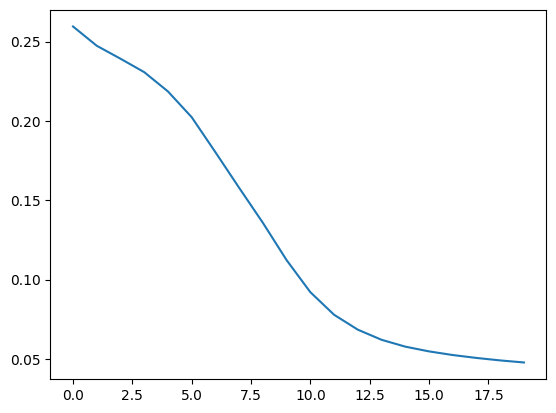

In [117]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# ============================
# Funzioni di attivazione e derivate
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # z non viene usato, ma lo manteniamo per avere la stessa firma
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a)
}

# ============================
# Funzioni di loss e derivate
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # Derivata elementwise: dL/dy_pred = - y_true/y_pred + (1-y_true)/(1-y_pred)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Classe della Rete Neurale
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.9, lambda_reg=0, reg_type="l2",
                 loss_function_name="binary_crossentropy",
                 activation_function_name="relu",
                 output_activation_function_name="sigmoid"):
        """
        :param layers: lista con la dimensione di ogni layer (input, hidden, output)
        :param learning_rate: tasso di apprendimento
        :param lambda_reg: coefficiente di regolarizzazione
        :param reg_type: tipo di regolarizzazione ("l2" o "l1")
        :param loss_function_name: nome della funzione di loss (deve essere presente in loss_functions e loss_derivatives)
        :param activation_function_name: nome della funzione di attivazione per i layer nascosti
        :param output_activation_function_name: nome della funzione di attivazione per il layer di output
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.loss_function_name = loss_function_name
        self.activation_function_name = activation_function_name
        self.output_activation_function_name = output_activation_function_name
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        """Inizializza i pesi e bias utilizzando un metodo di inizializzazione (He in questo esempio)."""
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Attivazione non supportata: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Derivata dell'attivazione non supportata: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        """
        Esegue la forward propagation e ritorna le liste:
        - Z: valori pre-attivazione per ogni layer
        - A: output attivati per ogni layer (incluso l'input come A[0])
        """
        A = [X]
        Z = []
        # Propagazione attraverso i layer nascosti
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_name)
            A.append(a_curr)
        # Propagazione nel layer di output
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.output_activation_function_name)
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        """
        Esegue la backward propagation calcolando i gradienti e aggiornando i parametri.
        La catena del gradiente viene calcolata in maniera modulare.
        """
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Derivata della loss non supportata: {self.loss_function_name}")
        # Calcola dL/dy_pred per l'output
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Calcola dL/dz nel layer di output
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.output_activation_function_name)
        # Calcolo del termine di regolarizzazione per il layer di output
        if self.reg_type == "l2":
            reg_term = self.lambda_reg * self.W[-1] / m
        elif self.reg_type == "l1":
            reg_term = self.lambda_reg * np.sign(self.W[-1]) / m
        else:
            reg_term = 0
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation nei layer nascosti
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_name)
            if self.reg_type == "l2":
                reg_term = self.lambda_reg * self.W[i] / m
            elif self.reg_type == "l1":
                reg_term = self.lambda_reg * np.sign(self.W[i]) / m
            else:
                reg_term = 0
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Aggiorna i parametri
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=1000, batch_size=32, verbose=True):
        """
        Esegue il training della rete mediante mini-batch gradient descent.
        Ritorna la lista degli errori per ogni epoca (ogni 10 epoche).
        """
        loss_history = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % int(epochs/20) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                # Calcolo del termine di regolarizzazione per il monitoraggio della loss
                if self.reg_type == "l2":
                    reg_term = (self.lambda_reg / 2) * sum(np.sum(w ** 2) for w in self.W)
                elif self.reg_type == "l1":
                    reg_term = self.lambda_reg * sum(np.sum(np.abs(w)) for w in self.W)
                else:
                    reg_term = 0
                total_loss = loss + reg_term
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")
        return loss_history
    
    def predict(self, X):
        """
        Restituisce le predizioni:
          - Se l'output ha un solo neurone, viene usata una soglia a 0.5.
          - Se l'output è one-hot encoded, viene usato argmax.
        """
        _, A = self._forward(X)
        output = A[-1]
        if output.shape[1] == 1:
            return (output > 0.5).astype(int)
        else:
            return np.argmax(output, axis=1)
    
    def evaluate(self, X, y):
        """
        Calcola l'accuratezza.
        Se y è one-hot encoded, converte le etichette in formato indice.
        """
        predictions = self.predict(X)
        if y.ndim > 1 and y.shape[1] > 1:
            y_true = np.argmax(y, axis=1)
        else:
            y_true = y
        return np.mean(predictions == y_true)

# ============================
# Esecuzione: Caricamento dataset, training e valutazione
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]
layers = [input_size, 4, 4, output_size]

# Istanziamo la rete con i parametri desiderati
nn = NeuralNetwork(
    layers,
    learning_rate=0.05,
    lambda_reg=0.00001,
    reg_type="l2",  # Cambia in "l2" per usare la regolarizzazione L2
    loss_function_name="mse",
    activation_function_name="relu",
    output_activation_function_name="sigmoid"
)

loss_history = nn.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)
accuracy = nn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 0.2598
Epoch 15, Loss: 0.2476
Epoch 30, Loss: 0.2394
Epoch 45, Loss: 0.2310
Epoch 60, Loss: 0.2188
Epoch 75, Loss: 0.2026
Epoch 90, Loss: 0.1805
Epoch 105, Loss: 0.1580
Epoch 120, Loss: 0.1360
Epoch 135, Loss: 0.1125
Epoch 150, Loss: 0.0923
Epoch 165, Loss: 0.0780
Epoch 180, Loss: 0.0686
Epoch 195, Loss: 0.0622
Epoch 210, Loss: 0.0579
Epoch 225, Loss: 0.0549
Epoch 240, Loss: 0.0526
Epoch 255, Loss: 0.0508
Epoch 270, Loss: 0.0492
Epoch 285, Loss: 0.0479
Test Accuracy: 0.9630


<Axes: >

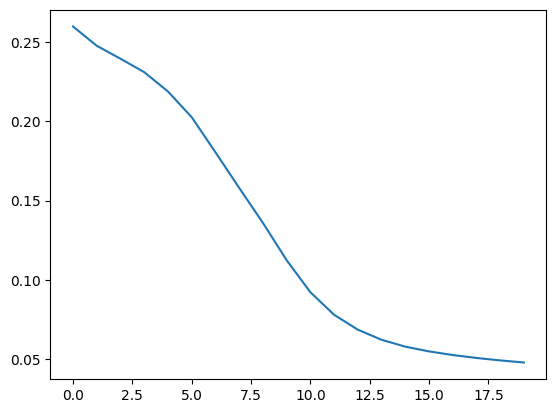

In [118]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# ============================
# Funzioni di attivazione e derivate
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # z non viene usato, ma lo manteniamo per avere la stessa firma
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a)
}

# ============================
# Funzioni di loss e derivate
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # Derivata elementwise: dL/dy_pred = - y_true/y_pred + (1-y_true)/(1-y_pred)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Funzioni per la regolarizzazione (modulari)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    """
    Calcola il termine di regolarizzazione da aggiungere al gradiente dei pesi.
    
    :param W: matrice dei pesi
    :param lambda_reg: coefficiente di regolarizzazione
    :param reg_type: tipo di regolarizzazione ("l2" o "l1")
    :param m: numero di esempi del batch
    :return: termine di regolarizzazione per il gradiente
    """
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    """
    Calcola il termine di loss della regolarizzazione per un elenco di pesi.
    
    :param W_list: lista delle matrici dei pesi
    :param lambda_reg: coefficiente di regolarizzazione
    :param reg_type: tipo di regolarizzazione ("l2" o "l1")
    :return: valore della regolarizzazione da sommare alla loss
    """
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Classe della Rete Neurale
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.9, lambda_reg=0.01, reg_type="l2",
                 loss_function_name="binary_crossentropy",
                 activation_function_name="relu",
                 output_activation_function_name="sigmoid"):
        """
        :param layers: lista con la dimensione di ogni layer (input, hidden, output)
        :param learning_rate: tasso di apprendimento
        :param lambda_reg: coefficiente di regolarizzazione
        :param reg_type: tipo di regolarizzazione ("l2" o "l1")
        :param loss_function_name: nome della funzione di loss (deve essere presente in loss_functions e loss_derivatives)
        :param activation_function_name: nome della funzione di attivazione per i layer nascosti
        :param output_activation_function_name: nome della funzione di attivazione per il layer di output
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.loss_function_name = loss_function_name
        self.activation_function_name = activation_function_name
        self.output_activation_function_name = output_activation_function_name
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        """Inizializza i pesi e bias utilizzando un metodo di inizializzazione (He in questo esempio)."""
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Attivazione non supportata: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Derivata dell'attivazione non supportata: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        """
        Esegue la forward propagation e ritorna le liste:
        - Z: valori pre-attivazione per ogni layer
        - A: output attivati per ogni layer (incluso l'input come A[0])
        """
        A = [X]
        Z = []
        # Propagazione attraverso i layer nascosti
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_name)
            A.append(a_curr)
        # Propagazione nel layer di output
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.output_activation_function_name)
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        """
        Esegue la backward propagation calcolando i gradienti e aggiornando i parametri.
        La catena del gradiente viene calcolata in maniera modulare.
        """
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Derivata della loss non supportata: {self.loss_function_name}")
        # Calcola dL/dy_pred per l'output
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Calcola dL/dz nel layer di output
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.output_activation_function_name)
        # Calcolo del gradiente con regolarizzazione per l'ultimo layer
        reg_term = compute_reg_gradient(self.W[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation nei layer nascosti
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_name)
            reg_term = compute_reg_gradient(self.W[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Aggiorna i parametri
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=1000, batch_size=32, verbose=True):
        """
        Esegue il training della rete mediante mini-batch gradient descent.
        Ritorna la lista degli errori per ogni epoca (ogni 10 epoche).
        """
        loss_history = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % int(epochs / 20) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_loss = loss + reg_loss
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")
        return loss_history
    
    def predict(self, X):
        """
        Restituisce le predizioni:
          - Se l'output ha un solo neurone, viene usata una soglia a 0.5.
          - Se l'output è one-hot encoded, viene usato argmax.
        """
        _, A = self._forward(X)
        output = A[-1]
        if output.shape[1] == 1:
            return (output > 0.5).astype(int)
        else:
            return np.argmax(output, axis=1)
    
    def evaluate(self, X, y):
        """
        Calcola l'accuratezza.
        Se y è one-hot encoded, converte le etichette in formato indice.
        """
        predictions = self.predict(X)
        if y.ndim > 1 and y.shape[1] > 1:
            y_true = np.argmax(y, axis=1)
        else:
            y_true = y
        return np.mean(predictions == y_true)

# ============================
# Esecuzione: Caricamento dataset, training e valutazione
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]
layers = [input_size, 4, 4, output_size]

# Istanziamo la rete con i parametri desiderati
nn = NeuralNetwork(
    layers,
    learning_rate=0.05,
    lambda_reg=0.00001,
    reg_type="l1",  # Cambia in "l2" per usare la regolarizzazione L2
    loss_function_name="mse",
    activation_function_name="relu",
    output_activation_function_name="sigmoid"
)

loss_history = nn.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)
accuracy = nn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Training della rete neurale per regressione...
Epoch 0, Loss: 2.0243
Epoch 15, Loss: 0.8982
Epoch 30, Loss: 0.7697
Epoch 45, Loss: 0.7187
Epoch 60, Loss: 0.6852
Epoch 75, Loss: 0.6588
Epoch 90, Loss: 0.6437
Epoch 105, Loss: 0.6298
Epoch 120, Loss: 0.6185
Epoch 135, Loss: 0.6087
Epoch 150, Loss: 0.5996
Epoch 165, Loss: 0.5909
Epoch 180, Loss: 0.5824
Epoch 195, Loss: 0.5745
Epoch 210, Loss: 0.5656
Epoch 225, Loss: 0.5596
Epoch 240, Loss: 0.5519
Epoch 255, Loss: 0.5461
Epoch 270, Loss: 0.5395
Epoch 285, Loss: 0.5326

Neural Network Test MSE (sul target scalato): 0.5626
Baseline Linear Regression Test MSE (sul target scalato): 0.4891


<Axes: >

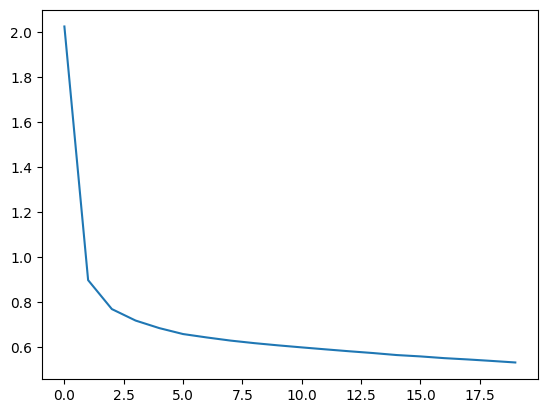

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import per il dataset e la baseline lineare
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# ============================
# Funzioni di attivazione e derivate
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # z non viene usato, ma lo manteniamo per avere la stessa firma
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Funzioni di loss e derivate
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Funzioni per la regolarizzazione (modulari)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Classe della Rete Neurale
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 task="classification"):
        """
        :param layers: lista con la dimensione di ogni layer (input, hidden, output)
        :param learning_rate: tasso di apprendimento
        :param lambda_reg: coefficiente di regolarizzazione
        :param reg_type: tipo di regolarizzazione ("l2" o "l1")
        :param loss_function_name: nome della funzione di loss (se None, viene settata in base al task)
        :param activation_function_name: attivazione per i layer nascosti
        :param output_activation_function_name: attivazione per il layer di output (se None, viene settata in base al task)
        :param task: "classification" o "regression"
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        
        # Impostiamo default diversi in base al task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            self.output_activation_function_name = output_activation_function_name or "linear"
        else:
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            self.output_activation_function_name = output_activation_function_name or "sigmoid"
            
        self.activation_function_name = activation_function_name
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            # Utilizziamo l'inizializzazione di He (ottimale per ReLU)
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Attivazione non supportata: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Derivata dell'attivazione non supportata: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        A = [X]
        Z = []
        # Propagazione attraverso i layer nascosti
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_name)
            A.append(a_curr)
        # Propagazione nel layer di output
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.output_activation_function_name)
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Derivata della loss non supportata: {self.loss_function_name}")
        # Calcola dL/dy_pred per l'output
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Calcola dL/dz nel layer di output
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.output_activation_function_name)
        reg_term = compute_reg_gradient(self.W[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation nei layer nascosti
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_name)
            reg_term = compute_reg_gradient(self.W[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Aggiorna i parametri
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True):
        loss_history = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % max(1, int(epochs / 20)) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_loss = loss + reg_loss
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")
        return loss_history
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:  # regressione
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# Esperimento di regressione con il dataset Diabetes
# ============================

# Caricamento e scaling del dataset
data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)  # rendiamo y bidimensionale

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Suddividiamo in train e test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Definiamo l'architettura della rete per regressione
input_size = X_train.shape[1]    # 10 feature
layers = [input_size, 10, 10, 1]   # 2 hidden layer con 10 neuroni ciascuno, 1 output

# Istanziamo la rete neurale per regressione
nn_reg = NeuralNetwork(
    layers=layers,
    learning_rate=0.001,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",               # per regressione usiamo MSE
    activation_function_name="relu",
    output_activation_function_name="linear",  # output lineare per regressione
    task="regression"
)

print("Training della rete neurale per regressione...")
loss_history = nn_reg.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)
nn_mse = nn_reg.evaluate(X_test, y_test)
print(f"\nNeural Network Test MSE (sul target scalato): {nn_mse:.4f}")

# Baseline: regressione lineare di sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_mse = np.mean((y_test - y_pred_lr) ** 2)
print(f"Baseline Linear Regression Test MSE (sul target scalato): {lr_mse:.4f}")

pd.Series(loss_history).plot()

Training della rete neurale per regressione...
Epoch 0, Loss: 2.0243
Epoch 15, Loss: 0.8982
Epoch 30, Loss: 0.7697
Epoch 45, Loss: 0.7187
Epoch 60, Loss: 0.6852
Epoch 75, Loss: 0.6588
Epoch 90, Loss: 0.6437
Epoch 105, Loss: 0.6298
Epoch 120, Loss: 0.6185
Epoch 135, Loss: 0.6087
Epoch 150, Loss: 0.5996
Epoch 165, Loss: 0.5909
Epoch 180, Loss: 0.5824
Epoch 195, Loss: 0.5745
Epoch 210, Loss: 0.5656
Epoch 225, Loss: 0.5596
Epoch 240, Loss: 0.5519
Epoch 255, Loss: 0.5461
Epoch 270, Loss: 0.5395
Epoch 285, Loss: 0.5326

Neural Network Test MSE (sul target scalato): 0.5626
Baseline Linear Regression Test MSE (sul target scalato): 0.4891


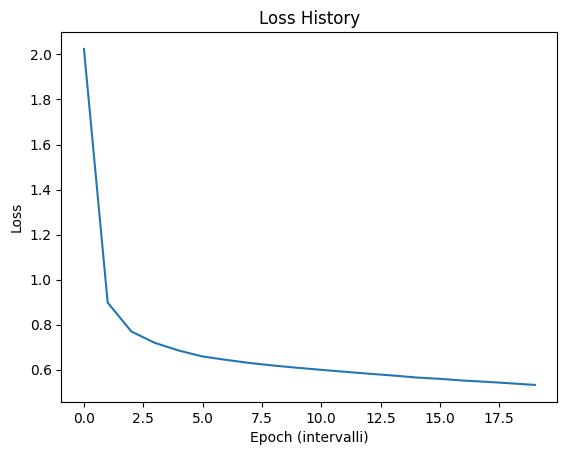

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import per il dataset e la baseline lineare
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# ============================
# Funzioni di attivazione e derivate
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # z non viene usato, ma lo manteniamo per avere la stessa firma
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Funzioni di loss e derivate
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Funzioni per la regolarizzazione (modulari)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Classe della Rete Neurale
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification"):
        """
        :param layers: lista con la dimensione di ogni layer (input, hidden, output)
        :param learning_rate: tasso di apprendimento
        :param lambda_reg: coefficiente di regolarizzazione
        :param reg_type: tipo di regolarizzazione ("l2" o "l1")
        :param loss_function_name: nome della funzione di loss (se None, viene settata in base al task)
        :param activation_function_name: attivazione da usare per i layer nascosti (se non viene specificato activation_function_names)
        :param output_activation_function_name: attivazione per il layer di output (se None, viene settata in base al task)
        :param activation_function_names: lista di nomi di funzioni di attivazione per ogni layer (lunghezza = len(layers)-1)
        :param task: "classification" o "regression"
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        
        # Impostiamo i default in base al task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # Se non è specificata una lista di attivazioni per ogni layer, usiamo la stessa per tutti i layer nascosti
        # e quella di output per l'ultimo layer
        if activation_function_names is None:
            # Creo una lista di lunghezza len(layers)-1
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("La lista activation_function_names deve avere una lunghezza pari a len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            # Inizializzazione di He (ottimale per ReLU)
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Attivazione non supportata: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Derivata dell'attivazione non supportata: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        A = [X]
        Z = []
        # Propagazione attraverso i layer nascosti (tutti tranne l'output)
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Propagazione nel layer di output
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Derivata della loss non supportata: {self.loss_function_name}")
        # Calcola dL/dy_pred per l'output
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Calcola dL/dz per il layer di output
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(self.W[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation nei layer nascosti
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(self.W[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Aggiorna i parametri
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True):
        loss_history = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % max(1, int(epochs / 20)) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_loss = loss + reg_loss
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")
        return loss_history
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:  # regressione
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# Esperimento di regressione con il dataset Diabetes
# ============================

# Caricamento e scaling del dataset
data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)  # rendiamo y bidimensionale

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Suddividiamo in train e test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Definiamo l'architettura della rete per regressione
input_size = X_train.shape[1]    # 10 feature
layers = [input_size, 10, 10, 1]   # 2 hidden layer con 10 neuroni ciascuno, 1 output

# Esempio: specifica di funzioni di attivazione diverse per ogni layer
# In questo caso, per i due layer nascosti usiamo "relu" e per l'output "linear"
activation_funcs = ["relu", "relu", "linear"]

# Istanziamo la rete neurale per regressione
nn_reg = NeuralNetwork(
    layers=layers,
    learning_rate=0.001,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",  # per regressione usiamo MSE
    activation_function_names=activation_funcs,
    task="regression"
)

print("Training della rete neurale per regressione...")
loss_history = nn_reg.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)
nn_mse = nn_reg.evaluate(X_test, y_test)
print(f"\nNeural Network Test MSE (sul target scalato): {nn_mse:.4f}")

# Baseline: regressione lineare di sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_mse = np.mean((y_test - y_pred_lr) ** 2)
print(f"Baseline Linear Regression Test MSE (sul target scalato): {lr_mse:.4f}")

pd.Series(loss_history).plot()
plt.xlabel("Epoch (intervalli)")
plt.ylabel("Loss")
plt.title("Loss History")
plt.show()


Training della rete neurale per classificazione...
Epoch 0, Loss: 0.6555
Epoch 15, Loss: 0.2408
Epoch 30, Loss: 0.1524
Epoch 45, Loss: 0.1215
Epoch 60, Loss: 0.1066
Epoch 75, Loss: 0.0972
Epoch 90, Loss: 0.0905
Epoch 105, Loss: 0.0856
Epoch 120, Loss: 0.0816
Epoch 135, Loss: 0.0776
Epoch 150, Loss: 0.0743
Epoch 165, Loss: 0.0715
Epoch 180, Loss: 0.0689
Epoch 195, Loss: 0.0665
Epoch 210, Loss: 0.0644
Epoch 225, Loss: 0.0624
Epoch 240, Loss: 0.0604
Epoch 255, Loss: 0.0588
Epoch 270, Loss: 0.0574
Epoch 285, Loss: 0.0561

Neural Network Classification Accuracy: 0.9825


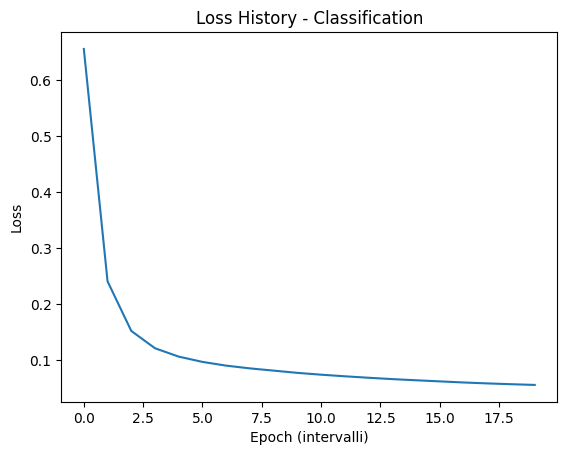

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming the NeuralNetwork class and related functions have been defined as in the previous code snippet.

# ============================
# Example for Binary Classification using the Breast Cancer Dataset
# ============================

# Caricamento del dataset
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)  # rendiamo y bidimensionale

# Scaling delle features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Suddivisione in train e test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Definizione dell'architettura della rete:
# - Input: numero di features (30)
# - Due hidden layer con 16 e 8 neuroni rispettivamente
# - Output: 1 neurone per la classificazione binaria
layers = [X_train.shape[1], 16, 8, 1]

# Specifica delle funzioni di attivazione per ogni layer:
# - Hidden layers: "relu"
# - Output layer: "sigmoid" (per ottenere una probabilità)
activation_funcs = ["relu", "relu", "sigmoid"]

# Istanziamo la rete neurale per classificazione
nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.01,
    lambda_reg=0.001,
    reg_type="l2",
    activation_function_names=activation_funcs,
    task="classification"  # Importante: specifica che si tratta di un task di classificazione
)

print("Training della rete neurale per classificazione...")
loss_history = nn_clf.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)

# Valutazione: la funzione evaluate restituisce l'accuratezza per il task di classificazione
accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

# Plot della storia del loss
pd.Series(loss_history).plot()
plt.xlabel("Epoch (intervalli)")
plt.ylabel("Loss")
plt.title("Loss History - Classification")
plt.show()
